<a href="https://colab.research.google.com/github/wwillis125/wwillis125.github.io/blob/master/DS_Unit_1_Sprint_Challenge_3_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

In [2]:
# TODO upload dataset
from google.colab import files

uploaded = files.upload()

Saving crx.data to crx.data


In [1]:
#upload data into pandas dataframe, replace headers

import pandas as pd

df = pd.read_csv('crx.data', header=None, names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [2]:
#get shape and info of dataset

print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# get dataset description

df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [4]:
#description of non numerical values

df.describe(exclude='number')

,A1,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [0]:
import numpy as np

In [0]:
# fix any missing values

df = df.replace({'?': np.NaN})

In [7]:
#see missing values

df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [8]:
# A2: A3: A8: A11: A14: A15: continuous
# find columns that are supposed to be numerical and convert

df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
# make column 14 into numeric

df['A14'] = pd.to_numeric(df['A14'])

In [0]:
# make column 2 into numeric

df['A2'] = pd.to_numeric(df['A2'])

In [11]:
#check to make sure datasets changed correctly
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [12]:
#split dataframe into approved and denied

# TODO
denied = df[df.A16 == '-']
approved = df[df.A16 == '+']

print(denied.shape)
print(approved.shape)

(383, 16)
(307, 16)


In [13]:
#check dataframe

denied.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,160.0,2,-


In [14]:
#check dataframe

approved.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [15]:
#get descriptions on new dataframe

denied.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [16]:
#get description on new dataframe

approved.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_1samp, chi2_contingency

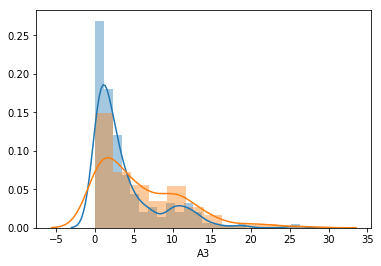

In [18]:
#plot histogram of A3

fix, ax = plt.subplots()
for sample in [denied['A3'], approved['A3']]:
  sns.distplot(sample)

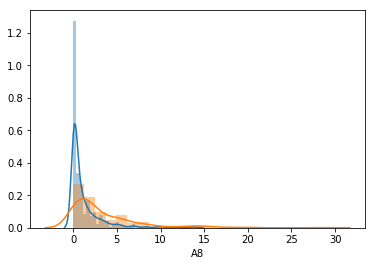

In [19]:
#plot histogram of A8

fix, ax = plt.subplots()
for sample in [denied['A8'], approved['A8']]:
  sns.distplot(sample)

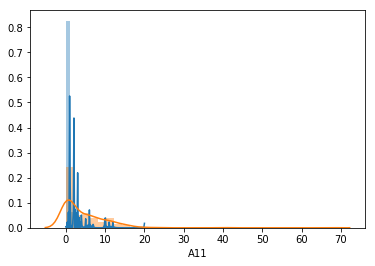

In [20]:
#plot histogram of A11

fix, ax = plt.subplots()
for sample in [denied['A11'], approved['A11']]:
  sns.distplot(sample)

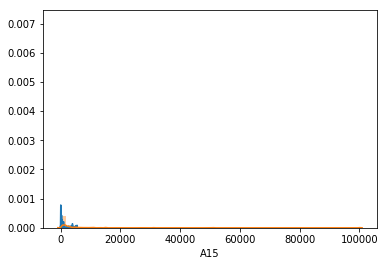

In [21]:
#plot histogram of A15

fix, ax = plt.subplots()
for sample in [denied['A15'], approved['A15']]:
  sns.distplot(sample);
  


In [22]:
# run ttest of A3

ttest_ind(denied['A3'], approved['A3'])

Ttest_indResult(statistic=-5.52998337614816, pvalue=4.551680702308068e-08)

In [23]:
# run ttest of A2

ttest_ind(denied['A2'], approved['A2'], nan_policy='omit')

Ttest_indResult(statistic=-4.2922156166315535, pvalue=2.0276637071781407e-05)

In [24]:
# run ttest of A15

ttest_ind(denied['A15'], approved['A15'], nan_policy='omit')

Ttest_indResult(statistic=-4.680216020964486, pvalue=3.4520256956287944e-06)

In [25]:
# run ttest of 14

ttest_ind(denied['A14'], approved['A14'], nan_policy='omit')

Ttest_indResult(statistic=2.6358251986645476, pvalue=0.008586135473979569)

In [26]:
# check non numeric dataset

df.describe(exclude='number')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [27]:
# create crosstab of A1

df_A1 = pd.crosstab(df['A16'], df['A1'], margins=True)

df_A1

A1,a,b,All
A16,,,
+,98,206,304
-,112,262,374
All,210,468,678


In [28]:
# create crosstab of A4

df_A4 = pd.crosstab(df['A16'], df['A4'], margins=True)
df_A4

A4,l,u,y,All
A16,,,,
+,2,256,45,303
-,0,263,118,381
All,2,519,163,684


In [29]:
# create crosstab of A6

df_A6 = pd.crosstab(df['A16'], df['A6'], margins=True)
df_A6

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,All
A16,,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32,303
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6,378
All,54,137,41,30,25,53,59,10,51,38,78,3,64,38,681


In [30]:
# create crosstab of A9

df_A9 = pd.crosstab(df['A16'], df['A9'], margins=True)
df_A9

A9,f,t,All
A16,,,
+,23,284,307
-,306,77,383
All,329,361,690


In [31]:
# create crosstab of A12

df_A12 = pd.crosstab(df['A16'], df['A12'], margins=True)
df_A12

A12,f,t,All
A16,,,
+,161,146,307
-,213,170,383
All,374,316,690


In [32]:
# create crosstab of A13

df_A13 = pd.crosstab(df['A16'], df['A13'], margins=True)
df_A13

A13,g,p,s,All
A16,,,,
+,287,5,15,307
-,338,3,42,383
All,625,8,57,690


In [33]:
#run chi squared test of A1

chi_squaredA1, p_valueA1, dofA1, expectedA1 = chi2_contingency(df_A1.values)
print(f"Chi-Squared: {chi_squaredA1}")

Chi-Squared: 0.41143508194591916


In [34]:
#run chi squared test of A9

chi_squaredA9, p_valueA9, dofA9, expectedA9 = chi2_contingency(df_A9.values)
print(f"Chi-Squared: {chi_squaredA9}")

Chi-Squared: 358.10032647163285


In [36]:
#run chi squared test of A6

chi_squaredA6, p_valueA6, dofA6, expectedA6 = chi2_contingency(df_A6.values)
print(f"Chi-Squared: {chi_squaredA6}")

Chi-Squared: 98.32520342679135


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

## Stretch Goals

Please do not work on anything listed in this section until you have adequately answered everything in the above three sections, all of these stretch goals are **OPTIONAL** but completing them will ensure you a score of 3 on the corresponding sections.

### Section 1 Stretch Goal: (do the following)
- Go above and beyond in conducting thorough data exploration including high quality comments and/or markdown text cells to explain your process/discoveries.

### Section 2 Stretch Goals: (do one of the following)
 - Write a function(s) to automate the execution of t-tests on the continuous variables treating the different class labels as the two samples.

 - Write a funciton(s) to automate the execution of chi^2 tests on all of the different combinations of categorical variables in the dataset.

### Section 3 Stretch Goals: (do one of the following)
- Construct a confidence interval around the mean of one of the continuous variables, communicate the results/interpretation of that confidence interval in the most consumable/easy-to-understand way that you can. (You may choose to include a graph here, but you don't necessarily have to) Communicate the precision of your estimate as clearly as possible.

- Explain the relationship between confidence intervals and T-tests, if possible, use code to demonstrate some important aspects of te